<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise5_7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analogous to task 2, but predicting continuous subject age using
KNeighborsRegressor(n_neighbors= 1…10) . Use crad[‘scorr_mean’] = 9.

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 29.6 MB/s 


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 9)
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)



Dataset created in /root/nilearn_data/oasis1



Downloaded 854024192 of 905208634 bytes (94.3%,    0.9s remaining) ...done. (16 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/craddock_2012/64ec9dc239add5cb58c7248a4136b852/craddock_2011_parcellations.tar.gz..... done.



Dataset created in /root/nilearn_data/craddock_2012



In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# We prepare the model 
knn = KNeighborsRegressor

In [ ]:
# We define the iterating variable
neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# We pre-allocate the variables we want to populate with accuracy scores
knn_tr_acc = []
knn_test_acc = []

In [ ]:
for x in neighbours:

    X, y = input_variables, output_variable
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    kNN = knn(n_neighbors=(x)).fit(X_train,y_train) # We fit the kNN training model
    score_k = kNN.score(X_train, y_train)
    knn_tr_acc.append(score_k) # We store the scores
    print('kNN training accuracy (coefficient of determination): %.2f' % ((score_k))) # We print the scores

    yhat_k = kNN.predict(X_test) # We use the kNN model to predict and store its prediction as "yhat"
    score_k = kNN.score(X_test, y_test) 
    knn_test_acc.append(score_k) # We store the scores
    print('kNN test accuracy: %.2f (coefficient of determination)' % ((score_k))) # We print the scores

kNN training accuracy (coefficient of determination): 1.00
kNN test accuracy: -0.01 (coefficient of determination)
kNN training accuracy (coefficient of determination): 0.81
kNN test accuracy: -0.06 (coefficient of determination)
kNN training accuracy (coefficient of determination): 0.73
kNN test accuracy: 0.10 (coefficient of determination)
kNN training accuracy (coefficient of determination): 0.65
kNN test accuracy: 0.23 (coefficient of determination)
kNN training accuracy (coefficient of determination): 0.63
kNN test accuracy: 0.25 (coefficient of determination)
kNN training accuracy (coefficient of determination): 0.61
kNN test accuracy: 0.25 (coefficient of determination)
kNN training accuracy (coefficient of determination): 0.59
kNN test accuracy: 0.20 (coefficient of determination)
kNN training accuracy (coefficient of determination): 0.53
kNN test accuracy: 0.20 (coefficient of determination)
kNN training accuracy (coefficient of determination): 0.50
kNN test accuracy: 0.28 (co

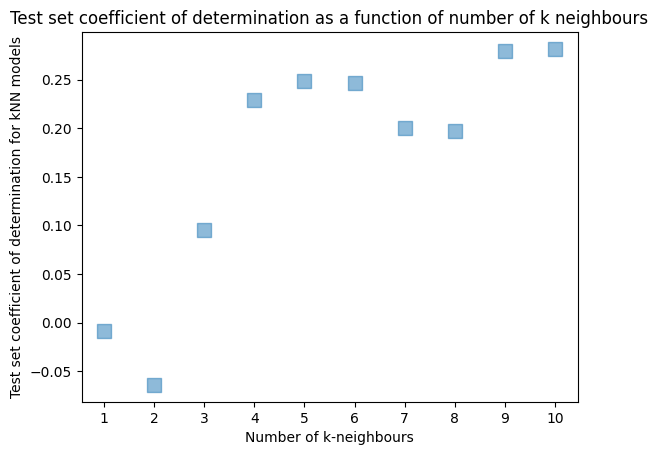

In [ ]:
# We're ready to plot
plt.style.use("default")
plt.scatter(neighbours,knn_test_acc, s=100, alpha = 0.5, marker = 's')
plt.gca().set(
    title="Test set coefficient of determination as a function of number of k neighbours",
    xlabel="Number of k-neighbours",
    ylabel="Test set coefficient of determination for kNN models",
    xticks = (neighbours)
)
plt.show()

It looks like kNN does fairly well, so long as the number of k-neighbours is not too low (< 3), which likely overfits the data.